In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
df = pd.read_excel('/content/Bookings data.xlsx')
df

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.00,119.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.00,162.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.00,250.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bathroom is a disability bathroom. Customer i...,NaN,7541
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Location_2,NaN,NaN,169.0,0,143.65,143.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,25.35,0,0,626: Team Natalie,Team Natalie,93.37,Team Natalie: 93.37,NaN,NaN,06/06/2018 12:25pm,NaN,14/07/2018 3:00pm,"2 Bedrooms, 2 x Bathroom",NaN,"If possible, we would like the same cleaner as...",7067
5607,2018-06-30,3:00pm,Jordan,Miralis,Jordan Miralis,NaN,South Yarra,VIC,3141,Location_3,NaN,NaN,129.0,0,129.00,129.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",77.40,"Team Dimpal (2P, I): 77.40",NaN,NaN,29/06/2018 1:19pm,NaN,NaN,"1 Bedroom, 1

In [9]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID,year
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2,2015
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.00,119.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5,2015
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4,2015
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.00,162.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8,2015
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.00,250.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2018-06-30,1:00pm,yvonne,chong,yvonne chong,NaN,Location_3,VIC,3033,Location_3,NaN,NaN,209.0,147,356.00,356.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",213.60,"Team Dimpal (2P, I): 213.60",NaN,NaN,28/06/2018 2:49pm,NaN,NaN,"3 Bedrooms, 3 x Bathroom, deep/initial cleanin...","30/06 deep clean, inside windows and balcony p...",NaN,7523,2018
5605,2018-06-30,1:00pm,Allan,Springall,Allan Springall,NaN,Chifley,NSW,2035,Location_2,NaN,NaN,129.0,199,328.00,328.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",213.20,"Team Jackson (4T, G): 213.20","Team Jackson (4T, G)","Team Jackson (4T, G)",29/06/2018 2:26pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, deep/initial cleaning...",Bathroom is a disability bathroom. Customer i...,NaN,7541,2018
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Location_2,NaN,NaN,169.0,0,143.65,143.65,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,25.35,0,0,626: Team Natalie,Team Natalie,93.37,Team Natalie: 93.37,NaN,NaN,06/06/2018 12:25pm,NaN,14/07/2018 3:00pm,"2 Bedrooms, 2 x Bathroom",NaN,"If possible, we would like the same cleaner as...",7067,2018
5607,2018-06-30,3:00pm,Jordan,Miralis,Jordan Miralis,NaN,South Yarra,VIC,3141,Location_3,NaN,NaN,129.0,0,129.00,129.00,0.0,0,stripe,1 time service,NaN,0.0,0.00,0,0,"1926: Team Dimpal (2P, I)","Team Dimpal (2P, I)",77.40,"Team Dimpal (2P, I): 77.40

In [13]:
df['Full Name'].nunique()

1701

In [23]:
first_payment = df.groupby('Full Name')['Date'].nth(0).sort_values()
first_payment = pd.DataFrame(first_payment)
first_payment = first_payment.rename({'Date' : 'First Payment'} , axis=1)
first_payment


,First Payment
Full Name,
Rebecca Jenkins,2015-08-05
Lauren Goss,2015-08-08
David Shellien,2015-08-14
Branko Dedich,2015-08-18
Peter Schafer,2015-08-28
...,...
Jordan Miralis,2018-06-30
Jeramee Rice,2018-06-30
Gunjan Sen,2018-06-30


In [31]:
previous_payment = df.groupby('Full Name')['Date'].nth(-1).sort_values()
previous_payment = pd.DataFrame(previous_payment)
previous_payment = previous_payment.rename({'Date' : 'Previous Payment'} , axis=1)
previous_payment


,Previous Payment
Full Name,
Lauren Goss,2015-08-08
David Shellien,2015-08-14
Branko Dedich,2015-08-18
Peter Schafer,2015-08-28
Belinder Coughlan,2015-09-25
...,...
Alison Northcote,2018-06-30
Ken Ransom,2018-06-30
Leigh Simpkin,2018-06-30


In [38]:
second_payment = df.groupby('Full Name')['Date'].nth(1).sort_values()
second_payment = pd.DataFrame(second_payment)
second_payment = second_payment.rename({'Date' : 'Second Payment'} , axis=1)
second_payment


,Second Payment
Full Name,
Rebecca Jenkins,2015-08-12
Rachael Craig,2015-10-15
Farida Zhakupova,2016-03-05
Bernadette Thompson,2016-03-12
Rupert Degas,2016-04-14
...,...
Alessandra Centorame,2018-06-28
Abby Lock,2018-06-28
Lynne OBrien,2018-06-29


In [40]:
second_last_payment = df.groupby('Full Name')['Date'].nth(-2).sort_values()
second_last_payment = pd.DataFrame(second_last_payment)
second_last_payment = second_last_payment.rename({'Date' : 'Second Last Payment'} , axis=1)
second_last_payment


,Second Last Payment
Full Name,
Rebecca Jenkins,2015-11-05
Sapna Champaneria,2015-12-24
Rachael Craig,2016-01-19
Alex Edwards,2016-05-10
Zara Johnson,2016-05-19
...,...
Lara Garrett,2018-06-22
Jane HART,2018-06-22
Bosko Ilic,2018-06-22


In [47]:
df['Frequency'].unique()

array(['Every week - 20% off', '1 time service',
       'Every 4 weeks - 10% off', 'Every 2 weeks - 15% off',
       'Weekly - 15% off', 'Fortnightly - 15% off', 'Monthly - 5% off',
       'Weekly - 20% off', 'Monthly - 10% off'], dtype=object)

In [48]:
df[df['Frequency']!='1 time service']

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID,year
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2,2015
2,2015-08-12,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,Our team did a v thorough job. Thank you.,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,06/08/2015 12:28am,NaN,19/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,4,2015
5,2015-08-19,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,NaN,NaN,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,13/08/2015 12:19am,NaN,26/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,7,2015
6,2015-08-26,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,NaN,NaN,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,20/08/2015 12:21am,NaN,09/09/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,10,2015
8,2015-09-09,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,NaN,NaN,142.0,0,113.60,113.60,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.40,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,Team Kawhara (G),NaN,02/09/2015 1:59pm,NaN,19/09/2015 9:00am,"2 Bedrooms, 1 x Bathroom",Customer has left the key inside an envelope i...,NaN,14,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,2018-06-30,12:00pm,Sheree,Stiff,Sheree Stiff,NaN,Greenwich,NSW,2065,Location_2,NaN,NaN,189.0,0,151.20,151.20,0.0,0,stripe,Weekly - 20% off,NaN,0.0,37.80,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",98.28,"Team Jackson (4T, G): 98.28",NaN,NaN,24/06/2018 12:16am,NaN,07/07/2018 12:00pm,"3 Bedrooms, 2 x Bathroom",NaN,Hi\nI have noted we will leave a key under the...,7443,2018
5602,2018-06-30,1:00pm,Alison,Northcote,Alison Northcote,NaN,Neutral Bay,NSW,2089,Location_2,NaN,NaN,135.0,0,114.75,114.75,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,20.25,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",74.59,"Team Jackson (4T, G): 74.59",NaN,NaN,15/06/2018 12:19am,NaN,13/07/2018 1:00pm,Hourly Service (2 Cleaners x 1.50 Hours),IMPORTANT ** 30/06 Jackson please ask your tea...,NaN,7256,2018
5603,2018-06-30,1:00pm,Sacha,Gregory,Sacha Gregory,NaN,Location_2,NSW,2037,Location_2,NaN,NaN,180.0,0,153.00,153.00,0.0,0,stripe,Fortnightly - 15% off,NaN,0.0,27.00,0,0,"214: Team Jackson (4T, G)","Team Jackson (4T, G)",116.28,"Team Jackson (4T, G): 116.28",NaN,NaN,17/06/2018 12:22am,NaN,14/07/2018 1:00pm,Hourly Service (2 Cleaners x 2.00 Hours),***Please work down the list pending on time**...,The key has been left in the electricity box b...,7299,2018
5606,2018-06-30,3:00pm,Maya,Wannan,Maya Wannan,NaN,Pyrmont,NSW,2009,Lo

In [60]:
Revenue = df.groupby('year')['Amount Paid by the Customer'].sum()
#Revenue = pd.DataFrame(Revenue)
Revenue

year
2015      4163.20
2016    111271.68
2017    431737.12
2018    460272.61
Name: Amount Paid by the Customer, dtype: float64

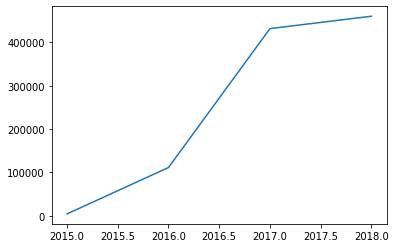

In [61]:
plt.plot(Revenue)

In [59]:
df1 = df.drop_duplicates(subset = ["Full Name"])
Unique_Customer = df1.groupby('year')['Full Name'].size()
#Unique_Customer = pd.DataFrame(Unique_Customer)
Unique_Customer


year
2015     11
2016    246
2017    809
2018    635
Name: Full Name, dtype: int64

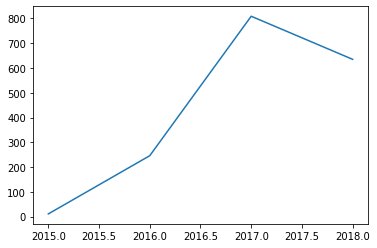

In [62]:
plt.plot(Unique_Customer)


In [63]:
Revenue_per_visit = Revenue/Unique_Customer
Revenue_per_visit

year
2015    378.472727
2016    452.323902
2017    533.667639
2018    724.838756
dtype: float64

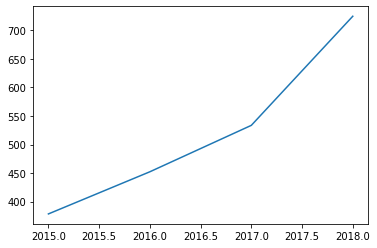

In [64]:
plt.plot(Revenue_per_visit)

In [110]:
df1 = df.drop_duplicates(subset = ["Full Name"])
df1.head()

,Date,Time,First Name,Last Name,Full Name,Company Name,City,State,Postal Code,Location,Rating Value,Rating Comment,Service Total,Extras Total,Final Amount,Amount Paid by the Customer,Amount Owed by Customer,Tip,Payment Method,Frequency,Discount Code,Discount from Code,Discount from Frequency,Discount from Referral,Giftcard Amount Used,Teams Assigned,Teams Assigned (without IDs),Team Earnings (Amount),Team Earnings (Summary),Team has Key,Team requested,Date Created,Created By,Next Booking Date,Services,Staff Notes,Customer Notes,Booking ID,year
0,2015-08-05,9:00am,Rebecca,Jenkins,Rebecca Jenkins,NaN,Crows Nest,NSW,2065,Location_2,2.0,We really liked the attitude of our team and t...,142.0,0,113.6,113.6,0.0,0,stripe,Every week - 20% off,NaN,0.0,28.4,0,0,5: Team Kawhara (G),Team Kawhara (G),68.16,Team Kawhara (G): 68.16,NaN,NaN,31/07/2015 5:06pm,NaN,12/08/2015 9:00am,"2 Bedrooms, 1 x Bathroom",NaN,NaN,2,2015
1,2015-08-08,9:30am,Lauren,Goss,Lauren Goss,NaN,Cremorne,NSW,2090,Location_2,NaN,NaN,122.0,30,119.0,119.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),71.40,Team Kawhara (G): 71.40,NaN,NaN,06/08/2015 7:07pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, 1 x Inside the oven +$30",Balcony cleaned as well. call the customers 20...,NaN,5,2015
3,2015-08-14,3:00pm,David,Shellien,David Shellien,NaN,LANE COVE,NSW,2066,Location_2,NaN,NaN,162.0,0,162.0,162.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),97.20,Team Kawhara (G): 97.20,NaN,NaN,13/08/2015 3:50pm,NaN,NaN,"3 Bedrooms, 1 x Bathroom",NaN,NaN,8,2015
4,2015-08-18,9:00am,Branko,Dedich,Branko Dedich,NaN,Gladesville,NSW,2111,Location_2,1.0,NaN,122.0,169,250.0,250.0,0.0,0,stripe,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),150.00,Team Kawhara (G): 150.00,NaN,NaN,12/08/2015 3:16pm,NaN,NaN,"1 Bedroom, 1 x Bathroom, Inside kitchen cabine...",Branko will be onsite during clean\n\nJob Deta...,NaN,6,2015
7,2015-08-28,9:00am,Peter,Schafer,Peter Schafer,NaN,Penrith,NSW,2750,Location_2,NaN,NaN,185.0,0,600.0,600.0,0.0,0,check,1 time service,NaN,0.0,0.0,0,0,5: Team Kawhara (G),Team Kawhara (G),360.00,Team Kawhara (G): 360.00,NaN,NaN,21/08/2015 1:51pm,NaN,NaN,"3 Bedrooms, 2 x Bathroom",Customer will be on site during clean\n\nFull ...,NaN,12,2015


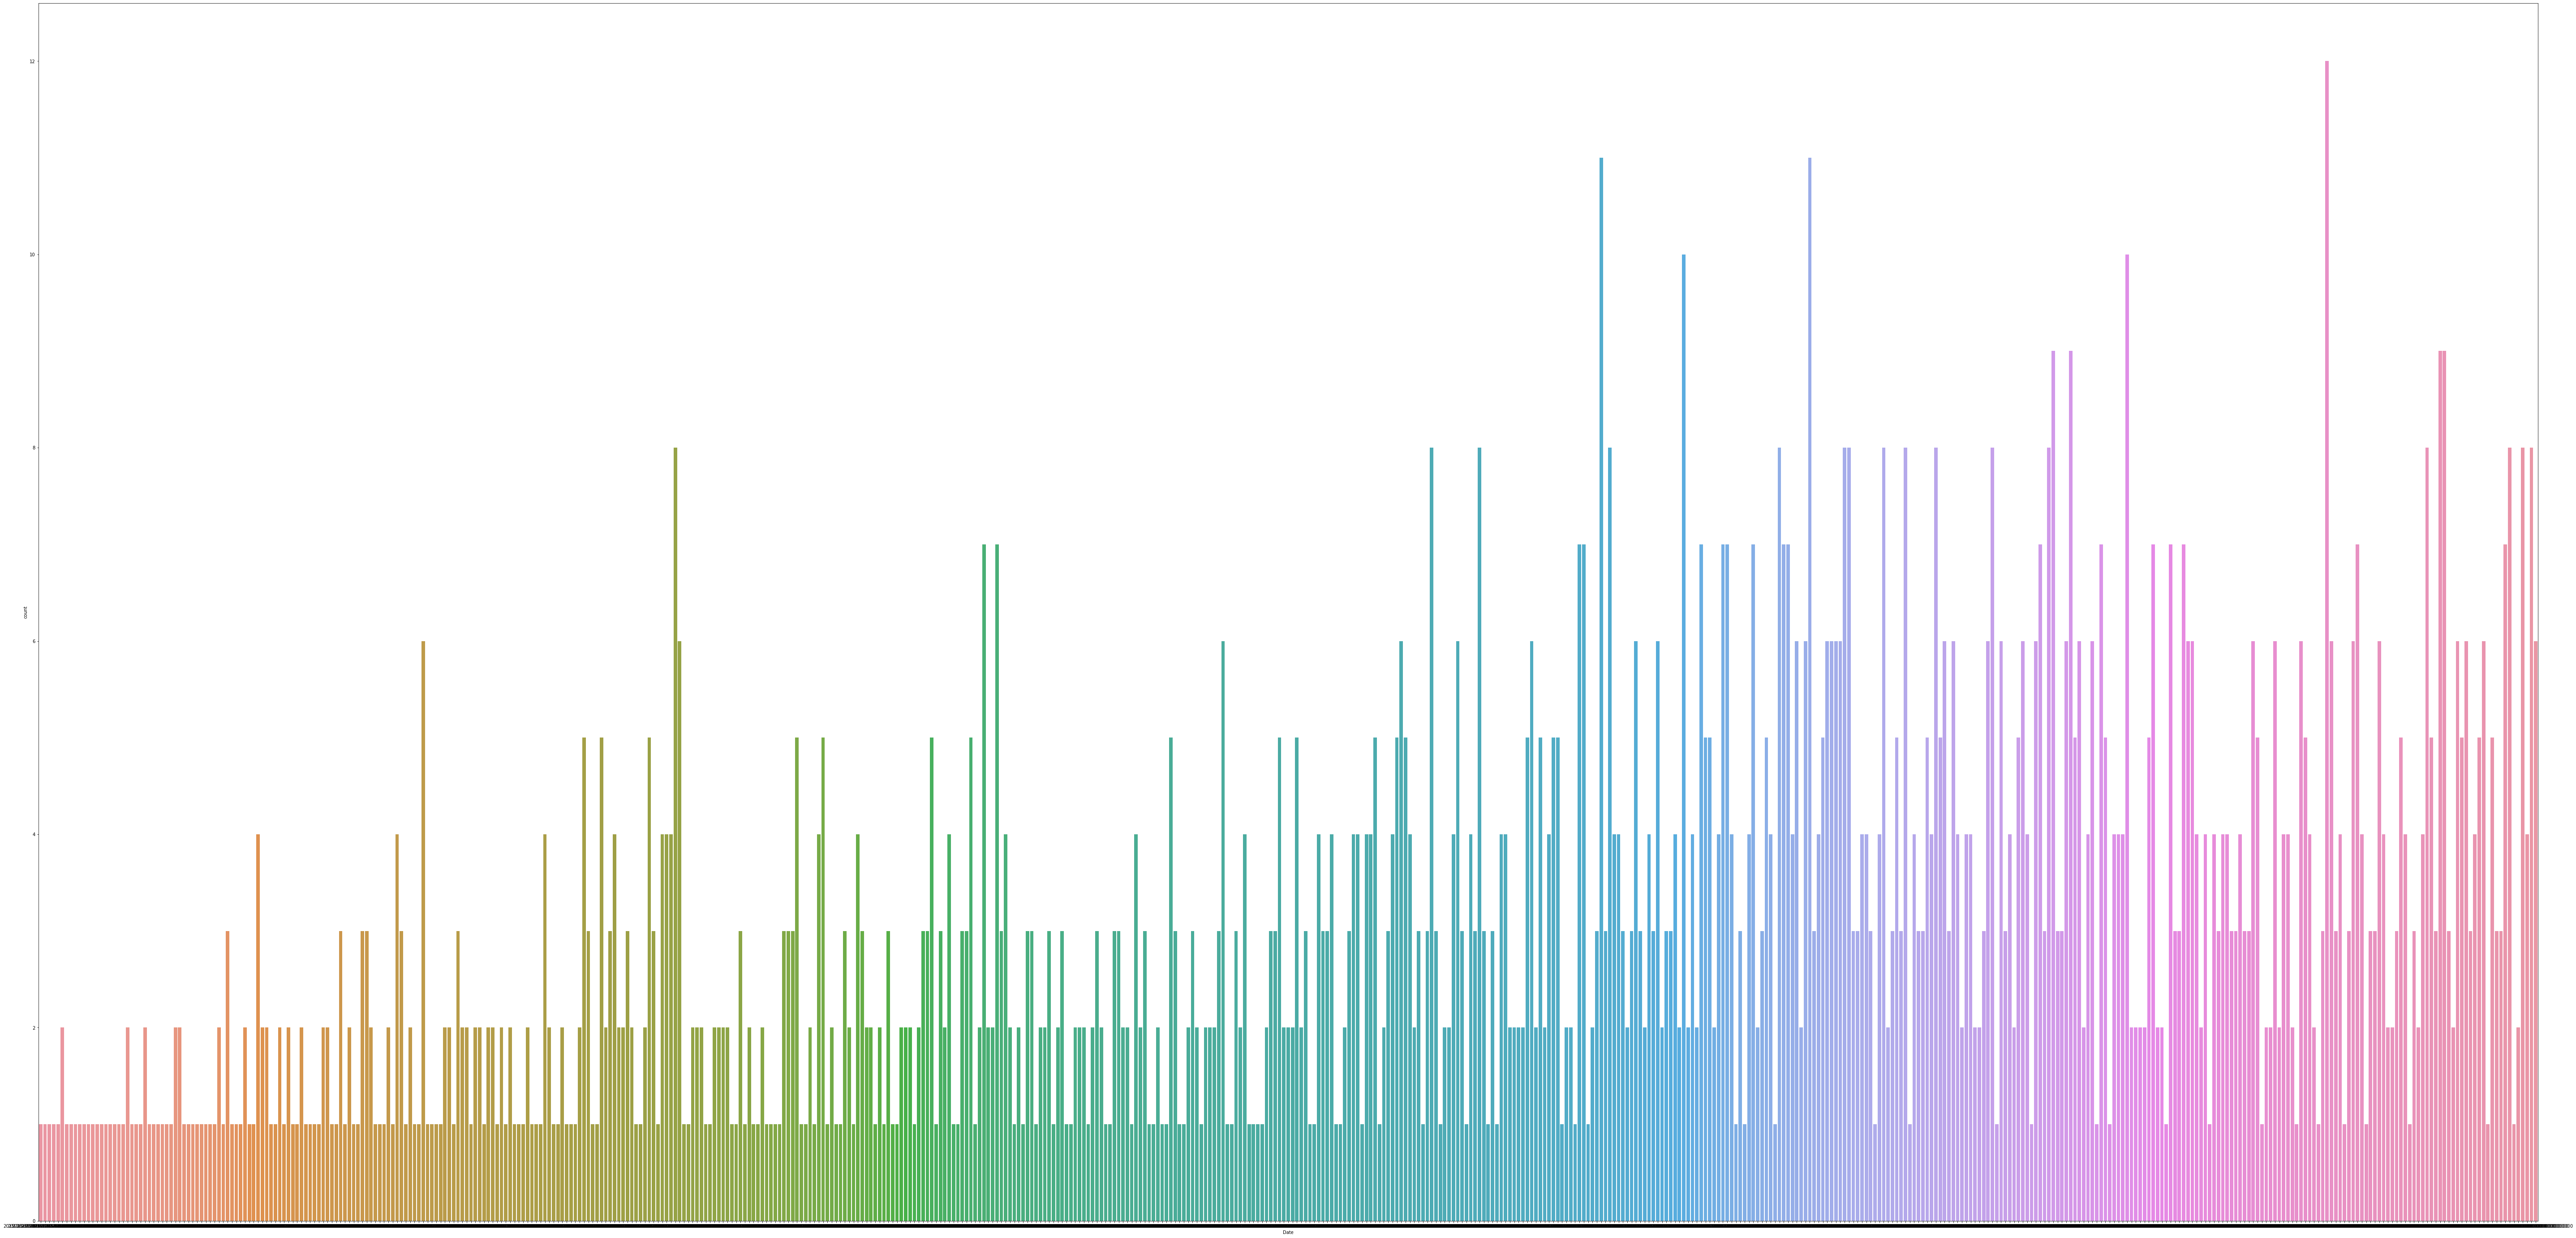

In [70]:
plt.figure(figsize=(100,50))
sns.countplot(x = 'Date'  , data = df1, orient = 90)

In [71]:
df15=df1[df1['year']==2015]
len(df15)

11

In [75]:
len(df15[df15['Frequency']=='1 time service'])

10

In [72]:
df16=df1[df1['year']==2016]
len(df16)

246

In [76]:
len(df16[df16['Frequency']=='1 time service'])

183

In [73]:
df17=df1[df1['year']==2017]
len(df17)

809

In [77]:
len(df17[df17['Frequency']=='1 time service'])

568

In [74]:
df18=df1[df1['year']==2018]
len(df18)

635

In [87]:
len(df18[df18['Frequency']=='1 time service'])

405

In [84]:
#Average Purchase Value

total_revenue = df['Amount Paid by the Customer'].sum()
total_revenue/5609


179.61216081297917

In [85]:
#Average Purchase Freq Rate
# no. of purchase/no. of customer

5609/1701

3.297472075249853

In [86]:
#Customer Value

179.61/3.29

54.59270516717326

### *Last*


In [67]:
df2=df[df['year']==2015]
len(df2)

25

In [88]:
df3 = df2.drop_duplicates(subset = ["Full Name"])
len(df3)

11

In [90]:
len(df3[df3['Frequency']=='1 time service'])

10

In [91]:
df5=df[df['year']==2016]
len(df5)

561

In [93]:
df6 = df5.drop_duplicates(subset = ["Full Name"])
len(df6)

248

In [94]:
len(df6[df6['Frequency']=='1 time service'])

184

In [95]:
df8=df[df['year']==2017]
len(df8)

2374

In [96]:
df9 = df8.drop_duplicates(subset = ["Full Name"])
len(df9)

863

In [97]:
len(df9[df9['Frequency']=='1 time service'])

586

In [98]:
df11=df[df['year']==2018]
len(df11)

2649

In [99]:
df12 = df11.drop_duplicates(subset = ["Full Name"])

len(df12)

841

In [100]:
len(df12[df12['Frequency']=='1 time service'])

465

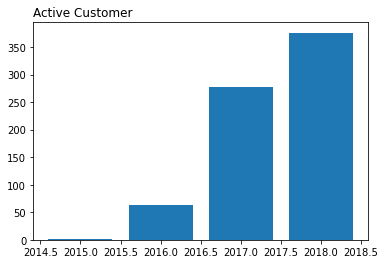

In [107]:
x = [2015 , 2016, 2017, 2018]
y = [1, 64 , 277 , 376]
plt.bar(x , y)
plt.title('Active Customer', 
             loc ='left', )
plt.show()


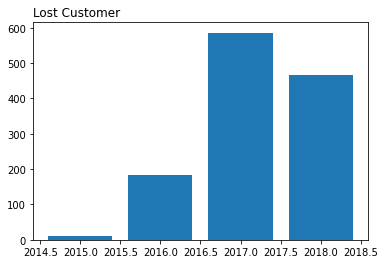

In [108]:
x = [2015 , 2016, 2017, 2018]
y = [10, 184 , 586, 465]
plt.bar(x , y)
plt.title('Lost Customer', 
             loc ='left', )
plt.show()